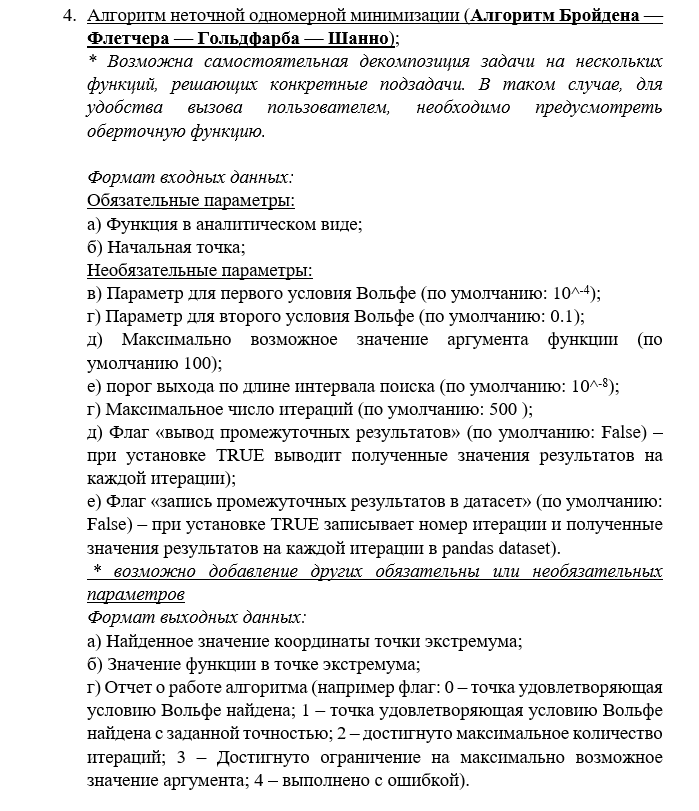

In [1]:
def func(var1 = 'x',var2 = 'y',f = 'x**2 - x*y + y**2 + 9*x - 6 * y + 20'):
    return f.replace(var1,'x[0]').replace(var2,'x[1]')
func()

'x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6 * x[1] + 20'

In [3]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import *

def gradFunc(var1 = 'x',var2 = 'y', f = 'x**2 - x*y + y**2 + 9*x - 6 * y + 20' ):
    x = Symbol(var1)
    y = Symbol(var2)
    f = parse_expr(f)
    return str(f.diff(x)).replace('x','x[0]').replace('y','x[1]') , str(f.diff(y)).replace('x','x[0]').replace('y','x[1]')
gradFunc()

('2*x[0] - x[1] + 9', '-x[0] + 2*x[1] - 6')

In [54]:
def f(x):
    return x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20

# gradient
def f1(x):
    return np.array([2 * x[0] - x[1] + 9, -x[0] + 2*x[1] - 6])

import numpy.linalg as ln
import scipy
import numpy as np
import pandas as pd

def BFGS(func = f,grad = f1, x0 =[1,1] , v1 = 10**(-4), v2 = 0.1,
         xmax = , interv = 10 **(-8), maxiter = 500, p1 = False, p2 = False ):
    
    k = 0
    gfk = grad(x0)
    I = np.eye(2, dtype=int)
    Hk = I
    xk = x0
    XK1 = []
    XK2 = []
    K = []
    F = []
    while ln.norm(gfk) > v1 and k < maxiter:
        
        k += 1
        pk = -np.dot(Hk, gfk)

        line_search = scipy.optimize.line_search(f, f1, xk, pk, c1 = v1, c2 = v2)
        alpha_k = line_search[0]
        
        xkp1 = xk + alpha_k * pk
        sk = xkp1 - xk
        xk = xkp1
        
        gfkp1 = grad(xkp1)
        yk = gfkp1 - gfk
        gfk = gfkp1
        
        ro = 1.0 / (np.dot(yk, sk))
        A1 = I - ro * sk[:, np.newaxis] * yk[np.newaxis, :]
        A2 = I - ro * yk[:, np.newaxis] * sk[np.newaxis, :]
        Hk = np.dot(A1, np.dot(Hk, A2)) + (ro * sk[:, np.newaxis] *
                                                 sk[np.newaxis, :])
        if p1:
            print(xk, func(xk))
       
        if p2 :
            XK1.append(xk[0])
            XK2.append(xk[1])
            K.append(k)
            F.append(func(xk))
    if p2 :
        data = pd.DataFrame(np.array([XK1,XK2,K,F]).transpose(), columns = ['x1', 'x2','k','F'])
        print(data)
        
    if k == maxiter :
        print (f'Координаты точки экстремума : {xk}')
        print (f'Значение функции в точке экстремума : {func(xk)}')
        print('Макс итераций')
        return (xk,func(xk),2)
    elif xk.any() > xmax :
        print (f'Координаты точки экстремума : {xk}')
        print (f'Значение функции в точке экстремума : {func(xk)}')
        print('Ограничение на макс возможное значение аргумента')
        return (xk,func(xk),3)
    else :
        print (f'Координаты точки экстремума : {xk}')
        print (f'Значение функции в точке экстремума : {func(xk)}')
        print('Точка ')
        return  (xk,func(xk), 1)
    

In [56]:
BFGS(f, f1)

Координаты точки экстремума : [-4.  1.]
Значение функции в точке экстремума : -1.0
Точка 


(array([-4.,  1.]), -1.0, 1)